_<h1 style="text-align: center;">Investigation: Time to reach maximum signal in I-Series</h1>_

<br>

<p style="text-align: center;">
<em>
Kyle O'Connell
</em>
</p>
<p style="text-align: center;">
<em>
MIDAC Corporation 
</em>
</p>
<p style="text-align: center;">
<em>
May 21, 2025
</em>
</p>

<br>

This report investigates the time required to reach sufficient saturation of ethylene gas at $10 \text{ppm}$ flowing at $4 \ \text{LPM}$ into a system of approximate volume $1750 \ \text{cm}^3$ which has an outlet port. For tractibility, we assume ideal mixing and diffusion of the Ethylene into the system.

<br>

First, we convert the volumetric units to be standard liters: $$V_{\text{Spectrometer}} = 1750 \ \text{in}^3 \times 0.0163871 \frac{L}{\text{in}^3} \approx 28.7 L \tag{1}$$

Next, we calculate the "time-constant", $\tau^1$ which gives us the characteristic time for one complete air exchange and is given by $$\tau = \frac{V}{Q} = \frac{28.7 L}{4 L/\text{min}} = 7.17 \text{min} \tag{2}$$ This means every $\approx 7.2$ mins an amount of gas equal to the chambers volume is pumped in.

Now, we need an equation to model the concentration increase of ethylene inside the chamber. Assuming ideal mixing we then use a Continuous Stirred Tank Reactor (CSTM)-Mixing Model$^{2,3}$ $$C(n) = C_{\text{in}}(1 - e^{-n}) \tag{3}$$ This result is derived$^{4,5,6,7}$ from the governing differential equation: $$\frac{\partial C}{\partial t} = \frac{Q}{V}C_{\text{in}} - \frac{Q}{V}C \equiv \text{Inflow} - \text{Outflow} \tag{4}$$ Rearranging we get: $$\frac{\partial C}{\partial t} + \frac{Q}{V}C = \frac{Q}{V}C_{\text{in}} \tag{5}$$ Which is a first order, linear inhomogenous differential equation with constant coefficients.

Given this, the standard solution consists of $2$ parts:
1. Homogenous solution (no inlet, just decay of initial concentration of $C_0$): $$C_{\text{hom}}(t) = C_0e^{-\frac{Qt}{V}} \tag{6}$$
2. Particular Solution (steady input at $C_{\text{in}}$): $$C_{\text{part}} = C_{\text{in}} \tag{7}$$

Combining these solutions and applying the initial condition $C(0) = 0$ (system initially purged with $0 \text{ppm}$ of ethylene inside) we find: $$C(t) = C_{\text{in}} - (C_{\text{in}} - 0)e^{-\frac{Qt}{V}} = C_{\text{in}} \left( 1 - e^{-\frac{Qt}{V}} \right ) \implies C(n) = C_{\text{in}}(1 - e^{-n}) \tag{8}$$ Where $\frac{Qt}{V} = n$ the __number of volume exchanges__


<br>

_<h3 style="text-align: center;">Analysis</h3>_


Ethylene Concentration & Bottle Remaining vs. Air Exchanges

 Exchange_Number  Time_min  Concentration_ppm  Gas_Passed_L  Pct_Ethylene_Remains
               0    0.0000             0.0000        0.0000              100.0000
               1    7.1693             6.3212       28.6774               88.1778
               2   14.3387             8.6466       57.3547               76.3555
               3   21.5080             9.5021       86.0321               64.5333
               4   28.6774             9.8168      114.7094               52.7111
               5   35.8467             9.9326      143.3868               40.8888
               6   43.0160             9.9752      172.0642               29.0666
               7   50.1854             9.9909      200.7415               17.2444
               8   57.3547             9.9966      229.4189                5.4221
               9   64.5241             9.9988      258.0963                0.0000
              10   71.6934          

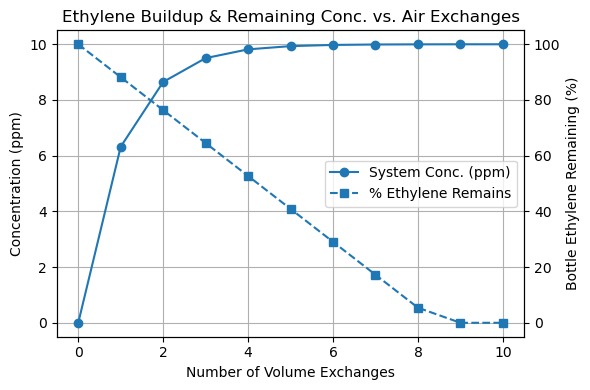

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
C_in_ppm       = 10.0            # Inlet concentration (ppm)
Q              = 4.0             # Flow rate (L/min)
V              = 1750 * 0.016387064  # System volume (L)
tau            = V / Q           # Minutes per volume exchange
n_exchanges    = 10              # Number of exchanges to model

# Bottle capacity calculation
# Bottle: 14 L at 240 psig. Absolute pressure = 240 + 14.7 = 254.7 psia = 254.7/14.7 atm
P_abs_atm      = (240 + 14.7) / 14.7
bottle_capacity_L = 14 * P_abs_atm  # Equivalent liters at 1 atm

# Arrays
exchanges      = np.arange(0, n_exchanges + 1)
concentrations = C_in_ppm * (1 - np.exp(-exchanges))      # ppm in cell
times          = exchanges * tau                          # minutes
gas_passed     = exchanges * V                            # liters of mix drawn from bottle
# Since bottle gas is 10 ppm ethylene, ethylene drawn = gas_passed * (10e-6)
# But to track % bottle ethylene remaining, we track total gas drawn vs bottle capacity
remaining_frac = np.maximum(0, 1 - gas_passed / bottle_capacity_L)
pct_remains    = remaining_frac * 100                      # % of bottle gas remaining

# Build DataFrame
df = pd.DataFrame({
    'Exchange_Number':       exchanges,
    'Time_min':              times,
    'Concentration_ppm':     concentrations,
    'Gas_Passed_L':          gas_passed,
    'Pct_Ethylene_Remains':  pct_remains
})

# Display table
print("\nEthylene Concentration & Bottle Remaining vs. Air Exchanges\n")
print(df.to_string(index=False, float_format='%.4f'))

# Plotting
fig, ax1 = plt.subplots(figsize=(6,4))

# Plot concentration curve
ax1.plot(exchanges, concentrations, 'o-', label='System Conc. (ppm)')
ax1.set_xlabel('Number of Volume Exchanges')
ax1.set_ylabel('Concentration (ppm)')
ax1.grid(True)

# Create second y-axis for remaining %
ax2 = ax1.twinx()
ax2.plot(exchanges, pct_remains, 's--', label='% Ethylene Remains')
ax2.set_ylabel('Bottle Ethylene Remaining (%)')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center right')

plt.title('Ethylene Buildup & Remaining Conc. vs. Air Exchanges')
plt.tight_layout()
plt.show()

<br>

_<h3 style="text-align: center;">References</h3>_

1. faculty.washington.edu/Prob_set_1_2004_key.pdf
2. https://physics.stackexchange.com/questions/272878/how-much-input-fluid-is-needed-to-fully-replace-the-contents-of-my-inline-chambe#:~:text=%24%24C%28t%29%20%3D%20C_0%20e%5E%7B
3. https://www3.epa.gov/ttn/emc/meetnw/2010/ftirjl.pdf
4. https://en.wikipedia.org/wiki/Continuous_stirred-tank_reactor
5. https://sites.engineering.ucsb.edu/~jbraw/chemreacfun/ch4/slides-matbal-2up.pdf
7. https://www.mathcentre.ac.uk/resources/uploaded/mathcentre-ode.pdf
8. https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/core-mathematics/calculus/integrating-factor.html